## Final Model and Deployment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS_Project/Dataset_EDA.csv')

In [ ]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperRatingCombined,LoanOriginationYear
0,1021339766868145413AB3B,193129,09:29.3,36,0,8/14/2009 0:00,0.16516,0.1580,0.1380,0.13885,...,0.0,0.0,0.0,1.0,0,0,0.0,258,C,2013
1,10273602499503308B223C1,1209647,28:07.9,36,0,Unknown,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,1.0,0,0,0.0,1,A,2014
2,0EF5356002482715299901A,658116,02:35.0,36,0,Unknown,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,1.0,0,0,0.0,158,A,2012
3,0F023589499656230C5E3E2,909464,38:39.1,36,0,Unknown,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,1.0,0,0,0.0,20,D,2013
4,0F05359734824199381F61D,1074836,26:37.1,60,0,Unknown,0.15425,0.1314,0.1214,0.11567,...,0.0,0.0,0.0,1.0,0,0,0.0,1,B,2013


### Model Formulas

#### Loan Tenure:

In [ ]:
df["Term"].describe()

count    55759.000000
mean        41.268818
std         10.774473
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: Term, dtype: float64

In [ ]:
date_cols = ["ClosedDate", "LoanOriginationDate", "ListingCreationDate"]

df.dropna()

df.shape

(55759, 80)

In [ ]:
df['ListingCreationDate'].dtype

dtype('O')

In [ ]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df.shape

(55759, 80)

In [ ]:
print(df.shape)
df[date_cols].head()

(55759, 80)


,ClosedDate,LoanOriginationDate,ListingCreationDate
0,2009-08-14,2007-09-12,2024-07-20 09:29:18
1,NaT,2014-03-03,NaT
2,NaT,2012-11-01,2024-07-20 02:35:00
3,NaT,2013-09-20,NaT
4,NaT,2013-12-24,NaT


LoanTenure = (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡_𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟 − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟) 𝑥 12 − (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒_𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑚𝑜𝑛𝑡ℎ)

In [ ]:
df["LoanTenure"] = ((df["ClosedDate"].dt.year - df["LoanOriginationDate"].dt.year) * 12) - (df["ClosedDate"].dt.month - df["LoanOriginationDate"].dt.month)

In [ ]:
print(df["LoanTenure"].shape)
df.shape

(55759,)


(55759, 81)

In [ ]:
df["LoanTenure"].describe()

count    24522.000000
mean        19.329663
std         14.409994
min        -11.000000
25%         10.000000
50%         18.000000
75%         35.000000
max         59.000000
Name: LoanTenure, dtype: float64

In [ ]:
print(df["Term"].describe())
print(df["LoanTenure"].describe())

count    55759.000000
mean        41.268818
std         10.774473
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: Term, dtype: float64
count    24522.000000
mean        19.329663
std         14.409994
min        -11.000000
25%         10.000000
50%         18.000000
75%         35.000000
max         59.000000
Name: LoanTenure, dtype: float64


In [ ]:
df.drop("LoanTenure", axis=1, inplace=True)
df.rename(columns={"Term" : "LoanTenure"}, inplace=True)

In [ ]:
df.shape

(55759, 80)

#### Equated Monthly Installments (EMI):

Tenure ---> LoanTenure
Principle repayment ---> LP_CustomerPrinciplePayments
Interest ---> BorrowerRate

In [ ]:
emi_cols = ["LP_CustomerPayments", "LP_CustomerPrincipalPayments"]
df[emi_cols].head()

,LP_CustomerPayments,LP_CustomerPrincipalPayments
0,11396.14,9425.00
1,0.00,0.00
2,5143.20,4091.09
3,2819.85,1563.22
4,679.34,351.89


For each row in the dataset:

Calculate result_1 = P * r * 〖(1+r)〗^n
Calculate result_2 = 〖(1+r)〗^n – 1
Calculate EMI = result_1 / result_2

In [ ]:
def cal_EMI(P, r, n):
  P = P.values
  r = r.values
  n = n.values
  #print(P.shape[0])
  result_1 = np.empty(0)
  result_2 = np.empty(0)
  result = np.empty(0)
  for i in range(P.shape[0]):
    #print(P[i])
    #print(r[i])
    #print(n[i])
    # EMI = P × r × (1 + r) ^ n / ((1 + r) ^ n – 1)
    #print(P[i] * (1 + r[i]))
    result_1 = np.append(result_1, P[i] * r[i] * np.power((1 + r[i]),n[i]))
    result_2 = np.append(result_2, np.power((1 + r[i]),n[i]) - 1)
    result = np.append(result, (result_1[i] / result_2[i]))

  return result

In [ ]:
df["BorrowerRate"].describe()

count    55759.000000
mean         0.191844
std          0.074861
min          0.000100
25%          0.132500
50%          0.181900
75%          0.249900
max          0.360000
Name: BorrowerRate, dtype: float64

In [ ]:
df["EMI"] = cal_EMI(df["LP_CustomerPrincipalPayments"], df["BorrowerRate"], df["LoanTenure"])

df["EMI"].describe()

count    55759.000000
mean       558.061532
std        726.627826
min          0.000000
25%         87.557234
50%        281.559119
75%        741.067590
max       8750.177828
Name: EMI, dtype: float64

#### Eligible Loan Amount (ELA):

Components of ELA:

A: “AppliedAmount” ---> LoanOriginalAmount
R: “Interest” ---> BorrowerRate
N: “LoanTenure” ---> LoanTenure
I: “IncomeTotal” ---> StatedMonthlyIncome

In [ ]:
ela_cols = ['DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome']

df[ela_cols].head()

,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,0.17,"$25,000-49,999",True,3083
1,0.18,"$50,000-74,999",True,6125
2,0.15,"$25,000-49,999",True,2875
3,0.26,"$100,000+",True,9583
4,0.36,"$100,000+",True,8333


In [ ]:
df_new = df[df['IncomeVerifiable'] == True]

print(df_new.shape)
print(df.shape[0] - df_new.shape[0])

(51327, 81)
4432


**Calculation Procedure:**
**For each row in the dataset:**
1.	Calculate: Total Payment Due = (A + (A*r)) * n
2.	Calculate: Max allowable amount = I * 12 * 30%
3.	If ( Total Payment Due <= Max allowable amount)
            Then ELA = AppliedAmount
            Else ELA = Max allowable amount

In [ ]:
def eligible_loan_amnt(df):
  df['Ava_Inc'] = (df['StatedMonthlyIncome'] * 12 * 0.3) * df['LoanTenure']
  df['Total_Loan_Amnt'] = np.round(df['LoanOriginalAmount'] + (df['LoanOriginalAmount'] * df['BorrowerRate']) *df['LoanTenure'])

  ELA = np.empty(0)

  for i in range(len(df['Ava_Inc'].values)):
    if df['Ava_Inc'].iloc[i] <= 0:
      ELA = np.append(ELA, 0)
    elif df['Total_Loan_Amnt'].iloc[i] <= df['Ava_Inc'].iloc[i]:
      ELA = np.append(ELA, df['Total_Loan_Amnt'].iloc[i])
    else:
      ELA = np.append(ELA, df['Ava_Inc'].iloc[i])

  df.drop(["Ava_Inc", "Total_Loan_Amnt"], axis=1, inplace=True)

  return ELA

In [ ]:
df['ELA'] = eligible_loan_amnt(df)

df['ELA'].describe()

count     55759.00000
mean      74185.30016
std       61334.89461
min           0.00000
25%       30579.00000
50%       52335.00000
75%      101140.00000
max      416990.00000
Name: ELA, dtype: float64

In [ ]:
df.shape

(55759, 82)

In [ ]:
df.select_dtypes(exclude=[int, float]).columns

Index(['ListingKey', 'ListingCreationDate', 'ClosedDate',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',
       'IncomeRange', 'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey', 'ProsperRatingCombined'],
      dtype='object')

In [ ]:
# List of columns you want to keep
columns_to_keep = ['LoanStatus', 'ELA', 'ListingNumber', 'BorrowerAPR', 'BorrowerRate', 'ClosedDate',
                   'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationQuarter',
                   'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LoanCurrentDaysDelinquent',
                   'MonthlyLoanPayment', 'EmploymentStatus']

# Select only the columns you want to keep
df_filtered = df[columns_to_keep]

In [ ]:
df_filtered[df_filtered['ClosedDate'].isna()]

,LoanStatus,ELA,ListingNumber,BorrowerAPR,BorrowerRate,ClosedDate,LoanMonthsSinceOrigination,LoanNumber,LoanOriginationQuarter,LP_CustomerPayments,LP_CustomerPrincipalPayments,LoanCurrentDaysDelinquent,MonthlyLoanPayment,EmploymentStatus
1,0,43120.0,1209647,0.12016,0.0920,NaT,0,134815,Q1 2014,0.0000,0.00,0,318.93,Employed
2,0,45064.0,658116,0.12528,0.0974,NaT,16,77296,Q4 2012,5143.2000,4091.09,0,321.45,Employed
3,0,127590.0,909464,0.24614,0.2085,NaT,6,102670,Q3 2013,2819.8500,1563.22,0,563.97,Employed
4,0,133260.0,1074836,0.15425,0.1314,NaT,3,123257,Q4 2013,679.3400,351.89,0,342.37,Employed
5,0,32290.0,750899,0.31032,0.2712,NaT,11,88353,Q2 2013,1226.7000,604.25,0,122.67,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55748,0,35666.0,755440,0.25781,0.2199,NaT,8,95904,Q3 2013,1066.7701,582.59,0,152.74,Employed
55750,0,96000.0,1131774,0.18633,0.1500,NaT,1,129924,Q1 2014,0.0000,0.00,0,519.98,Employed
55752,0,143466.0,931936,0.27623,0.2379,NaT,5,105840,Q4 2013,2347.3600,1179.90,0,586.84,Employed
55756,0,32149.0,511447,0.30532,0.2699,NaT,33,50460,Q2 2011,3918.7200,2531.42,0,122.46,Employed


In [ ]:
df_filtered.select_dtypes(exclude=('int', 'float'))

,ClosedDate,LoanOriginationQuarter,EmploymentStatus
0,2009-08-14,Q3 2007,Self-employed
1,NaT,Q1 2014,Employed
2,NaT,Q4 2012,Employed
3,NaT,Q3 2013,Employed
4,NaT,Q4 2013,Employed
...,...,...,...
55754,2010-03-19,Q1 2007,Retired
55755,2013-09-04,Q1 2012,Employed
55756,NaT,Q2 2011,Employed
55757,2013-02-25,Q2 2010,Full-time


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ClosedDate',	'LoanOriginationQuarter',	'EmploymentStatus']

# Encode labels of multiple columns at once

df_filtered[cols] = df_filtered[cols].apply(LabelEncoder().fit_transform)

# Print head

df_filtered.head()

,LoanStatus,ELA,ListingNumber,BorrowerAPR,BorrowerRate,ClosedDate,LoanMonthsSinceOrigination,LoanNumber,LoanOriginationQuarter,LP_CustomerPayments,LP_CustomerPrincipalPayments,LoanCurrentDaysDelinquent,MonthlyLoanPayment,EmploymentStatus
0,0,63034.0,193129,0.16516,0.1580,750,78,19141,14,11396.14,9425.00,0,330.43,6
1,0,43120.0,1209647,0.12016,0.0920,2401,0,134815,6,0.00,0.00,0,318.93,0
2,0,45064.0,658116,0.12528,0.0974,2401,16,77296,26,5143.20,4091.09,0,321.45,0
3,0,127590.0,909464,0.24614,0.2085,2401,6,102670,20,2819.85,1563.22,0,563.97,0
4,0,133260.0,1074836,0.15425,0.1314,2401,3,123257,27,679.34,351.89,0,342.37,0


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55759 entries, 0 to 55758
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanStatus                    55759 non-null  int64  
 1   ELA                           55759 non-null  float64
 2   ListingNumber                 55759 non-null  int64  
 3   BorrowerAPR                   55759 non-null  float64
 4   BorrowerRate                  55759 non-null  float64
 5   ClosedDate                    55759 non-null  int64  
 6   LoanMonthsSinceOrigination    55759 non-null  int64  
 7   LoanNumber                    55759 non-null  int64  
 8   LoanOriginationQuarter        55759 non-null  int64  
 9   LP_CustomerPayments           55759 non-null  float64
 10  LP_CustomerPrincipalPayments  55759 non-null  float64
 11  LoanCurrentDaysDelinquent     55759 non-null  int64  
 12  MonthlyLoanPayment            55759 non-null  float64
 13  E

In [ ]:
# df_filtered.to_csv('model_data.csv', index=False)

In [ ]:
df_filtered.columns

Index(['LoanStatus', 'ELA', 'ListingNumber', 'BorrowerAPR', 'BorrowerRate',
       'ClosedDate', 'LoanMonthsSinceOrigination', 'LoanNumber',
       'LoanOriginationQuarter', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LoanCurrentDaysDelinquent',
       'MonthlyLoanPayment', 'EmploymentStatus'],
      dtype='object')

### Phase 1: Data Preparation



In [ ]:
df['LoanStatus'].value_counts()

LoanStatus
0    49546
1     6213
Name: count, dtype: int64

In [ ]:
# Split data into features and target
X = df_filtered.drop(columns=['LoanStatus', 'ELA'])
y_class = df_filtered['LoanStatus']
y_reg = df_filtered['ELA']

In [ ]:
X.columns

Index(['ListingNumber', 'BorrowerAPR', 'BorrowerRate', 'ClosedDate',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationQuarter',
       'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
       'LoanCurrentDaysDelinquent', 'MonthlyLoanPayment', 'EmploymentStatus'],
      dtype='object')

In [ ]:
X.head()

,ListingNumber,BorrowerAPR,BorrowerRate,ClosedDate,LoanMonthsSinceOrigination,LoanNumber,LoanOriginationQuarter,LP_CustomerPayments,LP_CustomerPrincipalPayments,LoanCurrentDaysDelinquent,MonthlyLoanPayment,EmploymentStatus
0,193129,0.16516,0.1580,750,78,19141,14,11396.14,9425.00,0,330.43,6
1,1209647,0.12016,0.0920,2401,0,134815,6,0.00,0.00,0,318.93,0
2,658116,0.12528,0.0974,2401,16,77296,26,5143.20,4091.09,0,321.45,0
3,909464,0.24614,0.2085,2401,6,102670,20,2819.85,1563.22,0,563.97,0
4,1074836,0.15425,0.1314,2401,3,123257,27,679.34,351.89,0,342.37,0


In [ ]:
from sklearn.model_selection import train_test_split


# Split into training and testing sets
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Phase 2 Classification Model

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso

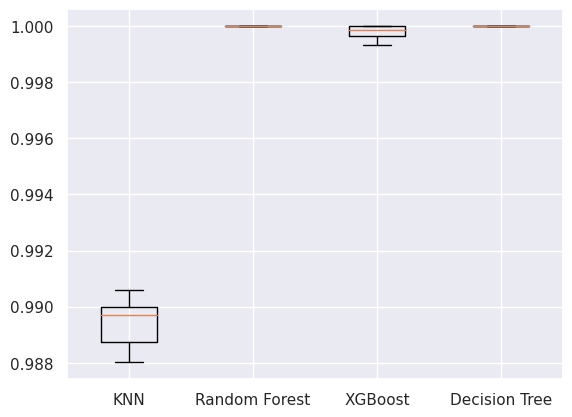

In [ ]:
models = {"KNN": KNeighborsClassifier(n_neighbors=5),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_class_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

m_score = []
m_name = []
predict = []
for name, model in models.items():
    model.fit(X_train_scaled, y_class_train)
    test_score = model.score(X_test_scaled, y_class_test)
    prediction = model.predict(X_test_scaled)
    report = classification_report(prediction, y_class_test)
    mat = confusion_matrix(prediction, y_class_test)
    m_name.append(name)
    m_score.append(test_score)
    predict.append(prediction)
    print("{} Test Set Accuracy: {}".format(name, test_score))
    print("{} Confusion Matrix:\n{}".format(name, mat))
    print("{} Classification Report:\n{}".format(name, report))

KNN Test Set Accuracy: 0.9903156384505022
KNN Confusion Matrix:
[[9911   81]
 [  27 1133]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9992
           1       0.93      0.98      0.95      1160

    accuracy                           0.99     11152
   macro avg       0.97      0.98      0.97     11152
weighted avg       0.99      0.99      0.99     11152

Random Forest Test Set Accuracy: 1.0
Random Forest Confusion Matrix:
[[9938    0]
 [   0 1214]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9938
           1       1.00      1.00      1.00      1214

    accuracy                           1.00     11152
   macro avg       1.00      1.00      1.00     11152
weighted avg       1.00      1.00      1.00     11152

XGBoost Test Set Accuracy: 0.9991929698708751
XGBoost Confusion Matrix:
[[9932    3]
 [   6 121

In [ ]:
acc_df = pd.DataFrame({'Model_Name': m_name, 'Model_Accuracy': m_score})

In [ ]:
acc_df.head()

,Model_Name,Model_Accuracy
0,KNN,0.990316
1,Random Forest,1.000000
2,XGBoost,0.999193
3,Decision Tree,1.000000


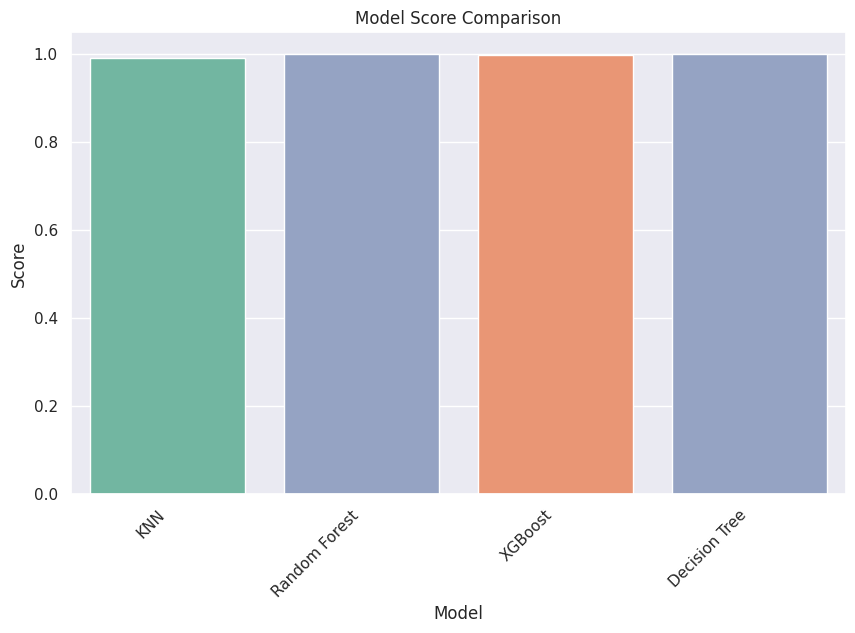

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model_Name', y='Model_Accuracy', data=acc_df, hue='Model_Accuracy', legend=False, palette='Set2')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

### Phase 3: Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error

y_class_pred = predict[1]

# Filter training data based on classification predictions
X_train_reg = X_train_scaled[y_class_train == 1]
y_reg_train_filtered = y_reg_train[y_class_train == 1]

# Filter test data based on classification predictions
X_test_reg = X_test_scaled[y_class_pred == 1]
y_reg_test_filtered = y_reg_test[y_class_pred == 1]


# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_reg_train_filtered)
y_reg_pred_lr = lr.predict(X_test_reg)


# 2. Lasso Regression (L1 Norm)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_reg, y_reg_train_filtered)
y_reg_pred_l1 = lasso.predict(X_test_reg)

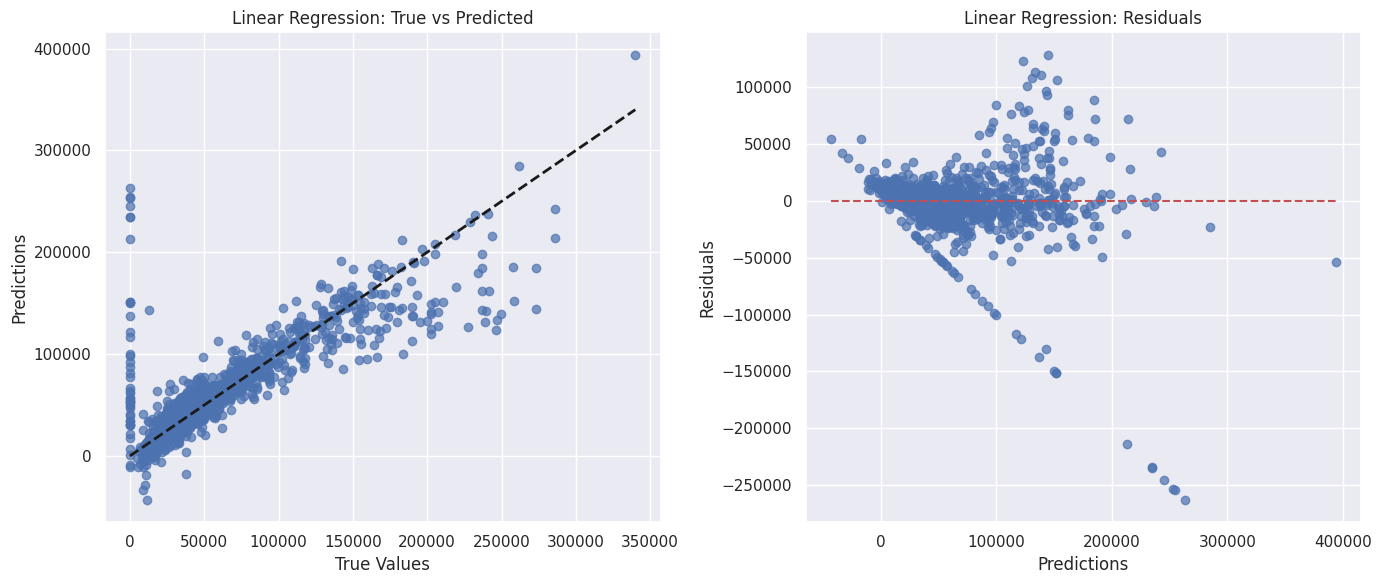

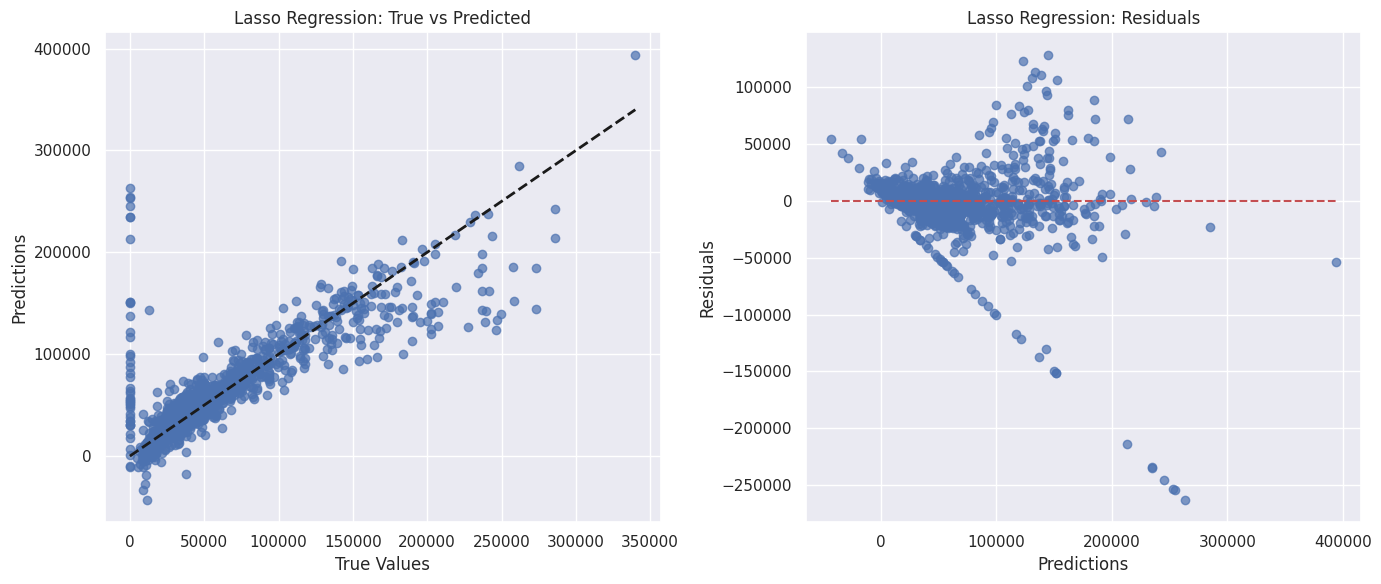

In [ ]:
import matplotlib.pyplot as plt

# Visualize Linear Regression Results
plt.figure(figsize=(14, 6))

# Plot True vs Predicted values for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_reg_test_filtered, y_reg_pred_lr, alpha=0.7)
plt.plot([y_reg_test_filtered.min(), y_reg_test_filtered.max()], [y_reg_test_filtered.min(), y_reg_test_filtered.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True vs Predicted')

# Plot Residuals for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_reg_pred_lr, y_reg_test_filtered - y_reg_pred_lr, alpha=0.7)
plt.hlines(y=0, xmin=y_reg_pred_lr.min(), xmax=y_reg_pred_lr.max(), colors='r', linestyles='dashed')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')

plt.tight_layout()
plt.show()

# Visualize Lasso Regression Results
plt.figure(figsize=(14, 6))

# Plot True vs Predicted values for Lasso Regression
plt.subplot(1, 2, 1)
plt.scatter(y_reg_test_filtered, y_reg_pred_l1, alpha=0.7)
plt.plot([y_reg_test_filtered.min(), y_reg_test_filtered.max()], [y_reg_test_filtered.min(), y_reg_test_filtered.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression: True vs Predicted')

# Plot Residuals for Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(y_reg_pred_l1, y_reg_test_filtered - y_reg_pred_l1, alpha=0.7)
plt.hlines(y=0, xmin=y_reg_pred_l1.min(), xmax=y_reg_pred_l1.max(), colors='r', linestyles='dashed')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Lasso Regression: Residuals')

plt.tight_layout()
plt.show()

### Phase 4: Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate classification model
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)

print(f"Classification Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Evaluate regression model
mae = mean_absolute_error(y_reg_test_filtered, y_reg_pred_lr)
mse = mean_squared_error(y_reg_test_filtered, y_reg_pred_lr)
r2 = r2_score(y_reg_test_filtered, y_reg_pred_lr)

print(f"Regression Model - MAE: {mae}, MSE: {mse}, R2: {r2}")

Classification Model - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Regression Model - MAE: 15586.770285700697, MSE: 905402677.0034641, R2: 0.6692351821567263


### Phase 5: Full Pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import joblib

class CustomPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, classifiers, regressors):
        self.classifiers = classifiers
        self.regressors = regressors
        self.scaler = StandardScaler()
        self.encoders = {}
        self.categorical_cols = []

    def fit(self, X, y_class, y_reg):
        # Identify categorical columns
        self.categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        # Fit LabelEncoder for each categorical column
        for col in self.categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            self.encoders[col] = le

        # Scale the features
        X_scaled = self.scaler.fit_transform(X)

        self.fitted_classifiers = []
        self.fitted_regressors = []

        # Fit classifiers
        for clf in self.classifiers:
            clf.fit(X_scaled, y_class)
            self.fitted_classifiers.append(clf)

        # Fit regressors on filtered data
        for reg in self.regressors:
            X_filtered = X_scaled[y_class == 1]
            y_reg_filtered = y_reg[y_class == 1]
            reg.fit(X_filtered, y_reg_filtered)
            self.fitted_regressors.append(reg)

        return self

    def predict(self, X):
        # Encode categorical features
        X = X.copy()  # Avoid changing the original dataframe
        for col in self.categorical_cols:
            if col in self.encoders:
                le = self.encoders[col]
                X[col] = le.transform(X[col].astype(str))
            else:
                raise ValueError(f"Column '{col}' was not seen during fitting.")

        # Scale the features
        X_scaled = self.scaler.transform(X)

        # Predict class
        y_class_preds = np.array([clf.predict(X_scaled) for clf in self.fitted_classifiers])
        y_class_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=y_class_preds)  # Majority voting

        # Predict regression
        X_filtered = X_scaled[y_class_pred == 1]
        if len(X_filtered) == 0:
            return y_class_pred, np.array([])  # No samples for regression

        y_reg_preds = np.array([reg.predict(X_filtered) for reg in self.fitted_regressors])
        y_reg_pred = y_reg_preds.mean(axis=0)  # Averaging for regression

        return y_class_pred, y_reg_pred

# Load the dataset
df = pd.read_csv('assets/model_data.csv')

# Identify categorical columns
categorical_cols = ['LoanOriginationQuarter', 'EmploymentStatus']

# Split data into features and targets
X = df.drop(columns=['LoanStatus', 'ELA'])
y_class = df['LoanStatus']
y_reg = df['ELA']

# Split into training and testing sets
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

# Initialize models
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lr = LinearRegression()
lasso = Lasso(random_state=42, max_iter=10000, alpha=1.0)

classifiers = [rfc, xgb]
regressors = [lr, lasso]

# Create and fit the custom pipeline
pipeline = CustomPipeline(classifiers=classifiers, regressors=regressors)
pipeline.fit(X_train, y_class_train, y_reg_train)

# Save the pipeline using joblib
joblib.dump(pipeline, 'assets/combined_pipeline.pkl')

Classification Predictions: [0 0 0 ... 0 0 0]
Regression Predictions: [-5.09651628e+09 -3.86137518e+09 -5.86570422e+09 ... -5.39724385e+09
 -5.43092193e+09 -2.73145705e+09]


### Phase 6: Final Evaluation and Deployment

In [ ]:
# Load and use the pipeline for predictions
loaded_pipeline = joblib.load('combined_pipeline.pkl')
y_class_pred, y_reg_pred = loaded_pipeline.predict(X_test)

In [ ]:
# Evaluate classification model
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)

print(f"Classification Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Filter test data based on classification predictions for regression evaluation
X_test_reg = X_test[y_class_pred == 1]
y_reg_test_filtered = y_reg_test[y_class_pred == 1]

# Evaluate regression model
mae = mean_absolute_error(y_reg_test_filtered, y_reg_pred)
mse = mean_squared_error(y_reg_test_filtered, y_reg_pred)
r2 = r2_score(y_reg_test_filtered, y_reg_pred)

print(f"Regression Model - MAE: {mae}, MSE: {mse}, R2: {r2}")

Classification Model - Accuracy: 0.9665530846484935, Precision: 0.7649653434152489, Recall: 1.0, F1-Score: 0.8668332738307748
Regression Model - MAE: 4395758625.364459, MSE: 2.3406512173103985e+19, R2: -7544096300.207914


In [ ]:
import pickle

with open('combined_pipeline.pkl', 'rb') as file:
    data = pickle.load(file)

UnpicklingError: invalid load key, '\x01'.

In [ ]:
if isinstance(data, pd.DataFrame):
    print(data.columns)

In [ ]:
print(data)

['ListingNumber' 'BorrowerAPR' 'BorrowerRate' 'DateCreditPulled'
 'LoanMonthsSinceOrigination' 'LoanNumber' 'LoanOriginationQuarter'
 'LP_CustomerPayments' 'LP_CustomerPrincipalPayments'
 'LoanCurrentDaysDelinquent' 'MonthlyLoanPayment' 'EmploymentStatus']
